Intro
====

This is an example that does stuff. Its purposes are:

1. To learn stuff,
2. to analyse something from my PhD,
3. to use Jupyter further down the line.

Of course
-----------

As per usual, let's try this:

In [1]:
from __future__ import print_function
print('Hello Jupyter world.')

Hello Jupyter world.


Learning
=====

Here we try to get some interesting stuff going.

Setup and data
-----------------

First, we import the useful modules and create some data:

In [7]:
import matplotlib.pyplot
import numpy
# Show the plots inside the notebook.
%matplotlib inline
# Make the figures high-resolution.
%config InlineBackend.figure_format='retina'

N=500 # No. points.
amp=0.1 # Noise apmplitude.
# Independent and dependent variables:
t=numpy.pi*numpy.linspace(0,2*numpy.pi,N) # Full phase.
y=numpy.sin(t) # Pristine signal
yNoise=y+amp*numpy.random.randn(N) # Add some noise.

Eyeball
---------

Now, let's plot the data and see what happens:

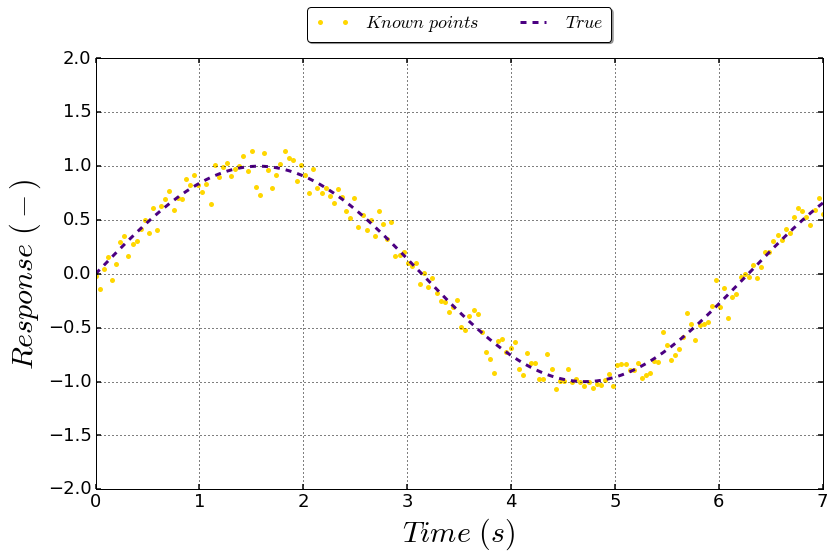

In [5]:
# Setup the plots.
ticksFontSize=18
labelsFontSizeSmall=20
labelsFontSize=30
titleFontSize=34
legendFontSize=18
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

# Plot the data.
fig=matplotlib.pyplot.figure(figsize=(12,8))
ax=fig.gca()
matplotlib.pyplot.grid(linewidth=1)
ax.set_xlabel(r"$Time\ (s)$",fontsize=labelsFontSize)
ax.set_ylabel(r"$Response\ (-)$",fontsize=labelsFontSize)
ax.set_xlim(0,7)
ax.set_ylim(-2,2)
ax.plot(t,yNoise,label=r"$Known\ points$",marker='o',c='gold',markersize=5,mew=0,lw=0)
ax.plot(t,y,label=r"$True$",ls='--',c='indigo',markersize=0,lw=3)
ax.tick_params(axis='both',reset=False,which='both',length=5,width=1.5)
matplotlib.pyplot.subplots_adjust(left=0.1,right=0.95,top=0.95,bottom=0.1)
box=ax.get_position()
ax.set_position([box.x0+box.width*0.0,box.y0+box.height*0.05,box.width*0.99,box.height*0.88])
ax.legend(bbox_to_anchor=(0.5,1.14),loc='upper center',prop={'size':legendFontSize},fancybox=True,shadow=True,ncol=3)
fig.show()


Equations
-----------

An equation for the probability of any event from a series of $N$ events, each with individual probability $P(E_i)$, occurring:

$$ P(\text{any out of N})=1-P\left( \bigcap\limits_{i=1}^{N} \neg E_i\right)=1-\prod_{i=1}^{N}(1-P(E_i)). $$